In [1]:
!pip install gpxpy matplotlib geopy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


Total distance: 0.73 km
Total duration: 21.9 min (0.36 hr)
Average pace: 30.19 min/km


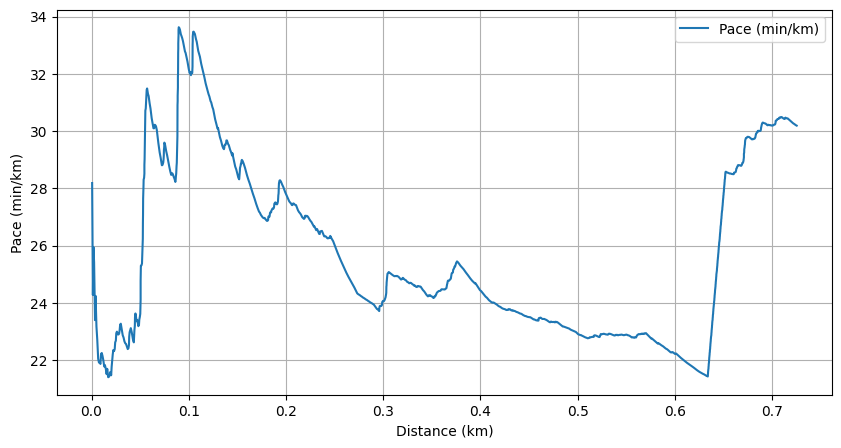

In [3]:
import gpxpy
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import pandas as pd

def read_gpx(file_path):
    """Reads GPX file and extracts track points."""
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    data = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                data.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                    'elevation': point.elevation,
                    'time': point.time
                })

    df = pd.DataFrame(data)
    return df

def calculate_metrics(df):
    """Calculates distance, pace, and duration from GPX points."""
    distances = [0]
    times = [0]

    for i in range(1, len(df)):
        # Calculate distance between consecutive points (in meters)
        coord1 = (df.loc[i-1, 'latitude'], df.loc[i-1, 'longitude'])
        coord2 = (df.loc[i, 'latitude'], df.loc[i, 'longitude'])
        dist = geodesic(coord1, coord2).meters
        distances.append(distances[-1] + dist)

        # Calculate time difference (in seconds)
        time_diff = (df.loc[i, 'time'] - df.loc[i-1, 'time']).total_seconds()
        times.append(times[-1] + time_diff)

    df['distance_m'] = distances
    df['time_s'] = times

    # Calculate pace (min/km)
    df['pace_min_per_km'] = (df['time_s'] / 60) / (df['distance_m'] / 1000)

    total_distance_km = df['distance_m'].iloc[-1] / 1000
    total_time_s = df['time_s'].iloc[-1]
    avg_pace = (total_time_s / 60) / total_distance_km

    return df, total_distance_km, total_time_s, avg_pace

def plot_pace(df):
    """Plots pace vs distance."""
    plt.figure(figsize=(10, 5))
    plt.plot(df['distance_m'] / 1000, df['pace_min_per_km'], label='Pace (min/km)')
    plt.xlabel('Distance (km)')
    plt.ylabel('Pace (min/km)')
    plt.grid(True)
    plt.legend()
    plt.show()


gpx_file = '/content/hanna-walking.gpx'
df = read_gpx(gpx_file)
df, total_dist, total_time, avg_pace = calculate_metrics(df)

print(f"Total distance: {total_dist:.2f} km")
print(f"Total duration: {total_time/60:.1f} min ({total_time/3600:.2f} hr)")
print(f"Average pace: {avg_pace:.2f} min/km")

plot_pace(df)